In [1]:
#getting cell lines from ensembl 
import urllib.request

fp = urllib.request.urlopen("ftp://ftp.ensembl.org/pub/release-104/regulation/homo_sapiens/Peaks/")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

data = mystr.split("\n")
cellLines = []
for line in data:
    cell = line.split(" ")[-1]
    cellLines.append(cell.replace("\r",""))
print(cellLines)

['A549', 'A673', 'B', 'B_PB', 'CD14_monocyte_1', 'CD14_monocyte_PB', 'CD38__naive_B_CB', 'CD38__naive_B_VB', 'CD4_CD25_ab_Treg_PB', 'CD4_ab_T', 'CD4_ab_T_CB', 'CD4_ab_T_PB_1', 'CD4_ab_T_PB_2', 'CD4_ab_T_Th', 'CD4_ab_T_VB', 'CD8_ab_T_CB', 'CD8_ab_T_PB', 'CD8_ab_T_VB', 'CMP_CD4_1', 'CMP_CD4_2', 'CMP_CD4_3', 'CM_CD4_ab_T_VB', 'DND_41', 'EB_CB', 'EM_CD4_ab_T_PB', 'EM_CD8_ab_T_VB', 'EPC_VB', 'GM10847', 'GM12878', 'GM12891', 'GM12892', 'GM15510', 'GM18505', 'GM18526', 'GM18951', 'GM19099', 'GM19193', 'H1_hESC_2', 'H1_hESC_3', 'H9_1', 'H9_2', 'HCT116', 'HSMM', 'HUES48', 'HUES6', 'HUES64', 'HUVEC', 'HUVEC_prol_CB', 'HeLa_S3', 'HepG2', 'Hu__Fe_', 'IMR_90', 'K562', 'Karpas_422', 'M0_CB', 'M0_VB', 'M1_CB', 'M1_VB', 'M2_CB', 'M2_VB', 'MCF_7', 'MM_1S', 'MSC', 'MSC_VB', 'NHLF', 'NK_PB', 'NPC_1', 'NPC_2', 'NPC_3', 'PC_3', 'PC_9', 'PFSK_1', 'Panc1', 'SK_N_', 'SK_N_SH_RA', 'T', 'T_PB', 'Th17', 'UCSF_4', 'adrenal_gland', 'amnion', 'aorta', 'astrocyte', 'astrocyte_cerebellum', 'astrocyte_spinal_cord', 'b

In [2]:
#reading hocomoco tfs and saving it into a list
f = open("HOCOMOCOv11_full_HUMAN_mono_meme_format.meme","r") #### download it from the hocomoco web page
TFlist = []
for line in f:
    if "MOTIF" in line:
        tf = line.split(" ")[1].split("_HUMAN")[0]
        TFlist.append(tf)
f.close()



In [3]:
#making a dict of experiment for each cell line}
import time
dataDict = {}
#in case of protein forming loops, we will remove it; taken from https://pubmed.ncbi.nlm.nih.gov/29224777/ plus CTCFL which is CTCF-like (CTCF appears in weintraub et al)
blockedList = ["YY1","CTCF", "HDGF","CGGBP1","ADNP","HMGB2","GATAD2A","ZNF512","ZNF532","MORC2","GATAD2B","MORC3","GABPA","NRF1","ZBTB11","ZNF143","JARID2","ZNF281","MGA","PRDM10","ZNF296","NR0B1","POU5F1","ZNF462","ESRRB","DPPA2","CTCFL"]

i = 0

while i <len(cellLines[:-1]): #-1 cause there is a '' in the cell list
    cell = cellLines[i]
    print("working with:", cell)
    dataDict[cell] = []
    fp = urllib.request.urlopen("http://ftp.ensembl.org/pub/release-104/regulation/homo_sapiens/Peaks/"+cell)
    if fp.getcode() == 200:
        #get the data and save the dict
        mybytes = fp.read()
        mystr = mybytes.decode("utf8")

        data = mystr.split("<a href=\"")

        for line in data:
            if ":" in line: #due all experiments have a date associated, so I can avoid non-experiment html code
                tf = line.split("/")[0]
                if tf not in blockedList:
                    dataDict[cell].append(tf)              
        i += 1
    else:
        #for some reason, the server did not return an "ok" status, so the code will sleep for a while and trying to get the data in the same cell line again
        time.sleep(60)
    fp.close()




 

working with: A549
working with: A673
working with: B
working with: B_PB
working with: CD14_monocyte_1
working with: CD14_monocyte_PB
working with: CD38__naive_B_CB
working with: CD38__naive_B_VB
working with: CD4_CD25_ab_Treg_PB
working with: CD4_ab_T
working with: CD4_ab_T_CB
working with: CD4_ab_T_PB_1
working with: CD4_ab_T_PB_2
working with: CD4_ab_T_Th
working with: CD4_ab_T_VB
working with: CD8_ab_T_CB
working with: CD8_ab_T_PB
working with: CD8_ab_T_VB
working with: CMP_CD4_1
working with: CMP_CD4_2
working with: CMP_CD4_3
working with: CM_CD4_ab_T_VB
working with: DND_41
working with: EB_CB
working with: EM_CD4_ab_T_PB
working with: EM_CD8_ab_T_VB
working with: EPC_VB
working with: GM10847
working with: GM12878
working with: GM12891
working with: GM12892
working with: GM15510
working with: GM18505
working with: GM18526
working with: GM18951
working with: GM19099
working with: GM19193
working with: H1_hESC_2
working with: H1_hESC_3
working with: H9_1
working with: H9_2
working 

In [4]:
#adding cell lines with methylation
methWeb = "ftp://ftp.ensembl.org/pub/data_files/homo_sapiens/GRCh38/dna_methylation_feature/"
fp = urllib.request.urlopen(methWeb)
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

data = mystr.split("\n")
methCell = []
for d in data:
    cell = d.split(" ")[-1].split("_")[0]
    if cell in dataDict: #dataDict came from the previous cell space
        print("adding methilation to",cell)
        dataDict[cell].append("methylation")

adding methilation to GM12878
adding methilation to GM12891
adding methilation to GM12892
adding methilation to HCT116
adding methilation to HSMM
adding methilation to HepG2
adding methilation to K562


In [5]:
#selecting cell lines with TF-associated data
cellLinesWithTFs = []
for cell in dataDict:
    for experiment in dataDict[cell]:
        if experiment in TFlist: #TFList came from the second cell space
            if cell not in cellLinesWithTFs:
                cellLinesWithTFs.append(cell)
print(cellLinesWithTFs)

['A549', 'GM12878', 'GM12891', 'GM12892', 'H1_hESC_3', 'HCT116', 'HUVEC', 'HeLa_S3', 'HepG2', 'IMR_90', 'K562', 'MCF_7', 'SK_N_', 'SK_N_SH_RA']


In [6]:
#making a dict of dicts for all elements for cell lines with TFs
finalDict = {}
for cell in cellLinesWithTFs:
    finalDict[cell] = {}
    for element in dataDict[cell]:      
        if element == "methylation" or element[0:2] == "H3" or element[0:2] == "H4" or element == "CTCF" or element == "DNase1":
            finalDict[cell][element] = 1

In [7]:
#converting dict for cell lines with tf into a pandas dataframe
import pandas as pd
df = pd.DataFrame(finalDict)
df = df.transpose()
df = df.dropna(how="all", axis=1)
df = df.fillna(0)
print(df)

            H3K27ac  H3K27me3  H3K36me3  H3K4me1  H3K4me3  H3K9me3  \
A549            1.0       1.0       1.0      1.0      1.0      1.0   
GM12878         1.0       1.0       1.0      1.0      1.0      1.0   
GM12891         0.0       0.0       0.0      0.0      0.0      0.0   
GM12892         0.0       0.0       0.0      0.0      0.0      0.0   
H1_hESC_3       1.0       1.0       1.0      1.0      1.0      1.0   
HCT116          1.0       1.0       1.0      1.0      1.0      1.0   
HUVEC           1.0       1.0       1.0      1.0      1.0      1.0   
HeLa_S3         1.0       1.0       1.0      1.0      1.0      1.0   
HepG2           1.0       1.0       1.0      1.0      1.0      1.0   
IMR_90          1.0       1.0       1.0      1.0      1.0      1.0   
K562            1.0       1.0       1.0      1.0      1.0      1.0   
MCF_7           1.0       1.0       1.0      1.0      1.0      1.0   
SK_N_           1.0       1.0       1.0      1.0      1.0      1.0   
SK_N_SH_RA      0.0 

<AxesSubplot:>

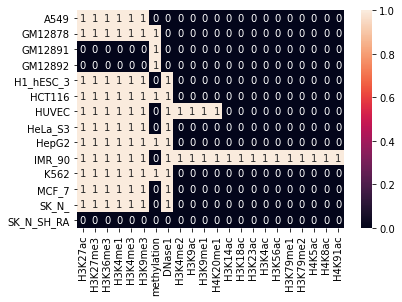

In [8]:
#plotting the dataframe
import numpy as np 
import seaborn as sns
%matplotlib inline
sns.heatmap(df, annot=True)

<Figure size 640x480 with 0 Axes>

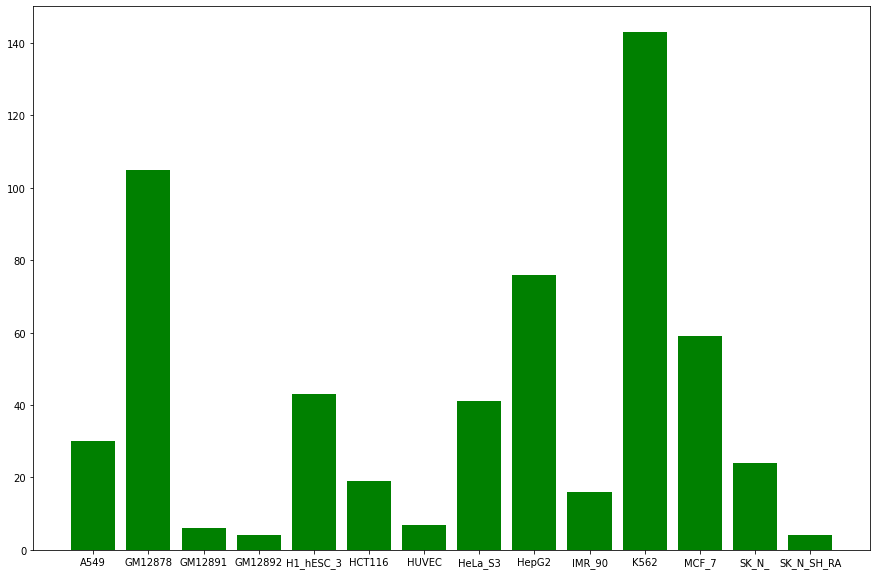

In [9]:
#histogram about how many TFs there are in each cell line
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
tfDict = {}
for cell in cellLinesWithTFs:
    tfDict[cell] = 0
    for element in dataDict[cell]:      
        if element != "methylation" and element[0:2] != "H3" and element[0:2] != "H4" and element != "CTCF" and element != "DNase1":
            tfDict[cell] += 1
figure(figsize=(15,10))
plt.bar(tfDict.keys(), tfDict.values(), color='g')
ax = plt.gca()
plt.show()